In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt 

In [ ]:
df=pd.DataFrame
df=pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv', encoding='utf-8')

In [ ]:
df.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,married,4,7,2,yes,1,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,2,married,6,1,1,no,1,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,4,single,0,3,1,yes,1,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,3,married,1,1,1,no,1,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,5,married,4,2,1,yes,1,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [ ]:
df.educacion.replace({"university.degree":0,"Technological_school":1,"tecnical_school":2,"professional.course":3,"preschool":4,"primary_school":5,
                   "unknown":6,"illiterate":7}, inplace=True)

In [ ]:
df.prestamo_personal.replace({"no":1, "yes":0,"unknown":2}, inplace=True)

In [ ]:
df.credito_sin_pago.replace({"no":1, "yes":0,"unknown":2}, inplace=True)

In [ ]:
lista_credito_sin_pago=list(df['credito_sin_pago'].value_counts().index)
print(lista_credito_sin_pago)
print("")

[1, 2, 0]



In [ ]:
filter_data = {"educacion":df["educacion"],"prestamo_personal":df["prestamo_personal"],"tarjetas_credito":df["tarjetas_credito"],"numero_empleados":df["numero_empleados"],
        "si_no":df["si_no"]}
filter_dataset = pd.DataFrame(data=filter_data)

X = pd.DataFrame(np.c_[filter_dataset['educacion'] , filter_dataset['prestamo_personal'] , filter_dataset['tarjetas_credito'], filter_dataset['numero_empleados']],
                 columns=['educacion','prestamo_personal','tarjetas_credito','numero_empleados'])

X_train, X_test, y_train, y_test = train_test_split(X, df.si_no, random_state=0)

In [80]:
arbol_clasi=DecisionTreeClassifier(max_depth=4, random_state=42)

In [81]:
arbol_clasi.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [82]:
arbol_clasi.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
accuary = arbol_clasi.score(X_test, y_test)
print(accuary)

0.8893852578420899


In [ ]:
class_names_list=list(['educacion','prestamo_personal','tarjetas_credito','numero_empleados'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasi,feature_names=X.columns, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')


True

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
3,numero_empleados,0.659
2,tarjetas_credito,0.184
0,educacion,0.085
1,prestamo_personal,0.073


In [ ]:
max_depth_lista = list(range(1, 6))

accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, y_train)
    score = arbol_clasi.score(X_test, y_test)
    accuracy.append(score)


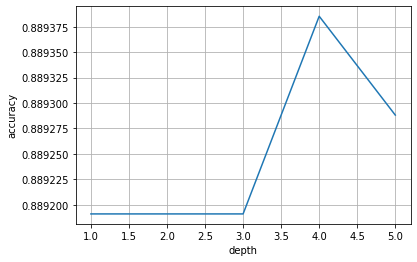

In [ ]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()